In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_policy = pd.read_excel('Mask_to_Covid_FOR_ILI_WORK.xlsx', engine='openpyxl')
df_policy = df_policy.sort_values(by='Date', ascending=True)

# Policy Quantification

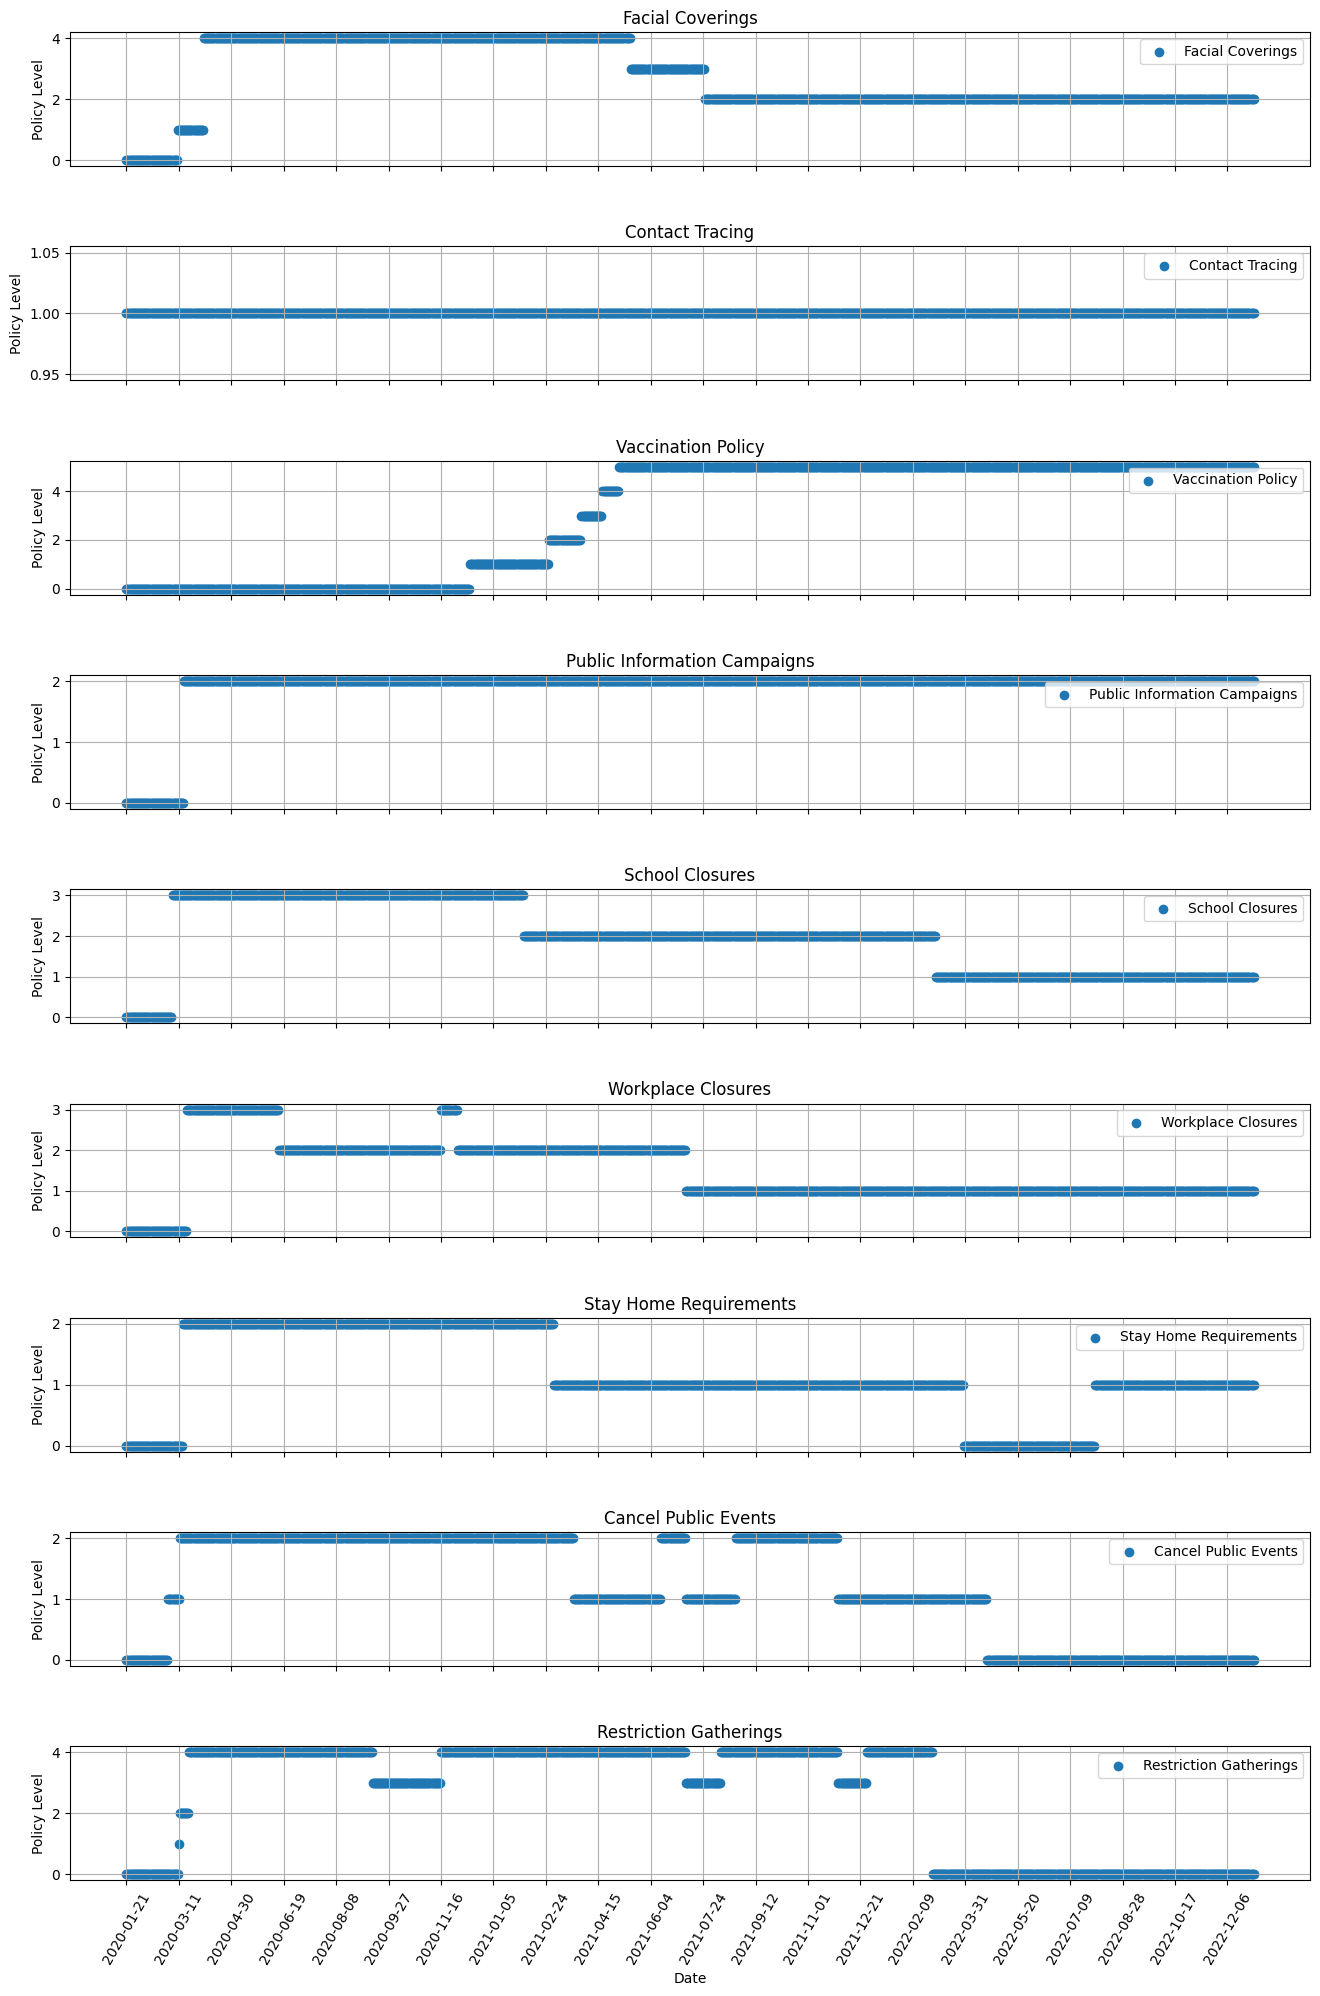

In [3]:
# Filter the dataframe for the United States
df_policy_us = df_policy[df_policy['Country'] == 'United States of America']
df_policy_us = df_policy_us.copy()
df_policy_us['Date'] = pd.to_datetime(df_policy_us['Date'])

df_policy_us['Year'] = df_policy_us['Date'].dt.year

# Group by 'Year', 'Date' and take the mean value for each policy
df_policy_us_grouped = df_policy_us.groupby(['Year', 'Date']).mean().reset_index()


# Creating a figure with multiple subplots
fig, axes = plt.subplots(9, 1, figsize=(16, 24), sharex=True)

# Plot the policies on individual subplots using scatter plots
axes[0].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['facial_coverings'], label='Facial Coverings')
axes[1].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['contact_tracing'], label='Contact Tracing')
axes[2].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['vaccination_policy'], label='Vaccination Policy')
axes[3].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['public_information_campaigns'], label='Public Information Campaigns')
axes[4].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['school_closures'], label='School Closures')
axes[5].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['workplace_closures'], label='Workplace Closures')
axes[6].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['stay_home_requirements'], label='Stay Home Requirements')
axes[7].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['cancel_public_events'], label='Cancel Public Events')
axes[8].scatter(df_policy_us_grouped['Date'], df_policy_us_grouped['restriction_gatherings'], label='Restriction Gatherings')

# Set titles and ylabel for the subplots
for ax, title in zip(axes, ['Facial Coverings', 'Contact Tracing', 'Vaccination Policy',
                             'Public Information Campaigns', 'School Closures', 'Workplace Closures',
                             'Stay Home Requirements', 'Cancel Public Events', 'Restriction Gatherings']):
    ax.set_title(title)
    ax.set_ylabel('Policy Level')
    ax.legend()
    ax.grid()

# Set xlabel and xticks for the last subplot
axes[-1].set_xlabel('Date')
date_range = pd.date_range(df_policy_us_grouped['Date'].min(), df_policy_us_grouped['Date'].max(), freq='50D')
axes[-1].set_xticks(date_range)
axes[-1].set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=60)

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.6)

# Show the combined graph with all policies for the United States
plt.show()


# Policy Accumulation

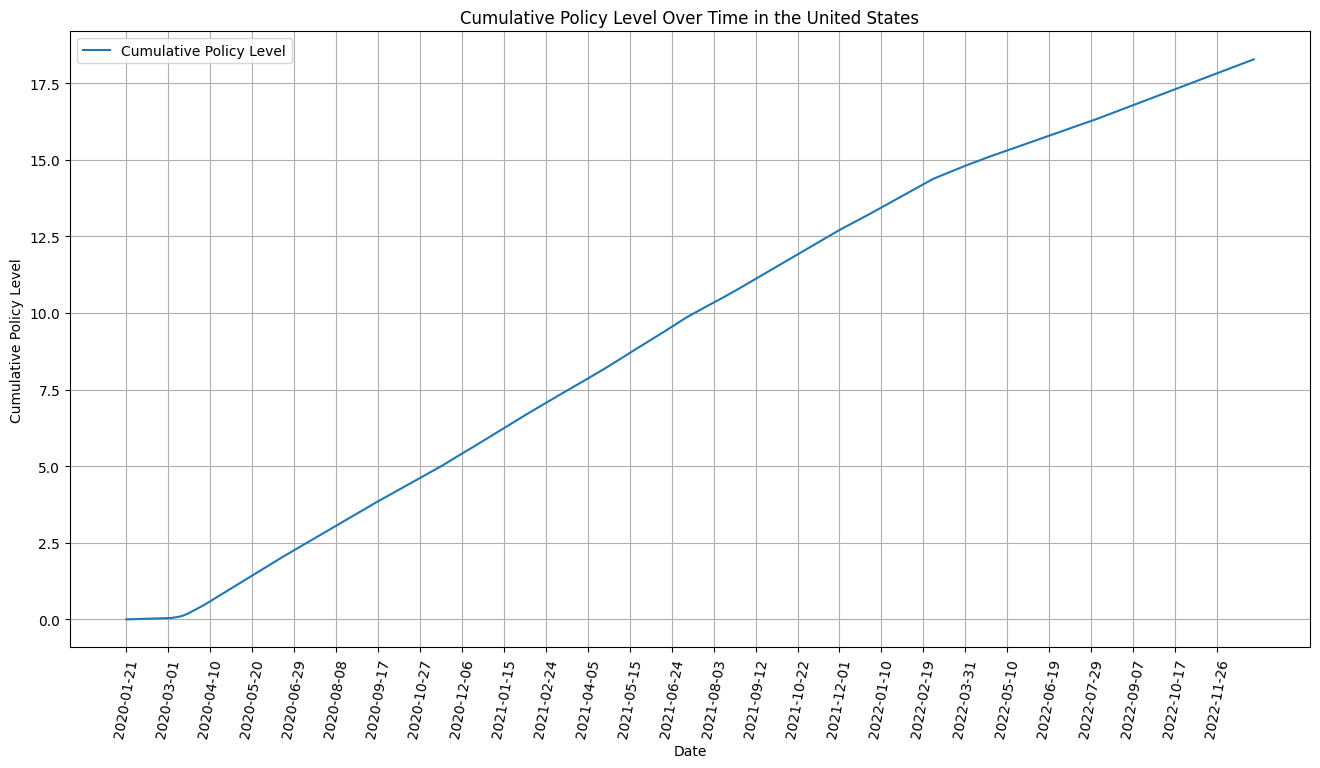

In [4]:
policy_columns = ['facial_coverings', 'contact_tracing', 'vaccination_policy',
                  'public_information_campaigns', 'school_closures', 'workplace_closures',
                  'stay_home_requirements', 'cancel_public_events', 'restriction_gatherings']

cumulative_columns = [col + '_cumulative' for col in policy_columns]
df_policy_us_grouped[cumulative_columns] = df_policy_us_grouped[policy_columns].cumsum()
df_policy_us_grouped['cumulative_policy'] = df_policy_us_grouped[cumulative_columns].sum(axis=1)

# Create a figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the cumulative policy levels
ax.plot(df_policy_us_grouped['Date'], df_policy_us_grouped['cumulative_policy']/1000, label='Cumulative Policy Level')

# Set xlabel, ylabel, and title for the plot
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Policy Level')
ax.set_title('Cumulative Policy Level Over Time in the United States')

# Set xticks and xticklabels
date_range = pd.date_range(df_policy_us_grouped['Date'].min(), df_policy_us_grouped['Date'].max(), freq='40D')
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=80)

# Add a legend and grid
ax.legend()
ax.grid()

# Show the plot
plt.show()

# 2020-2022 US COVID-19 Cases

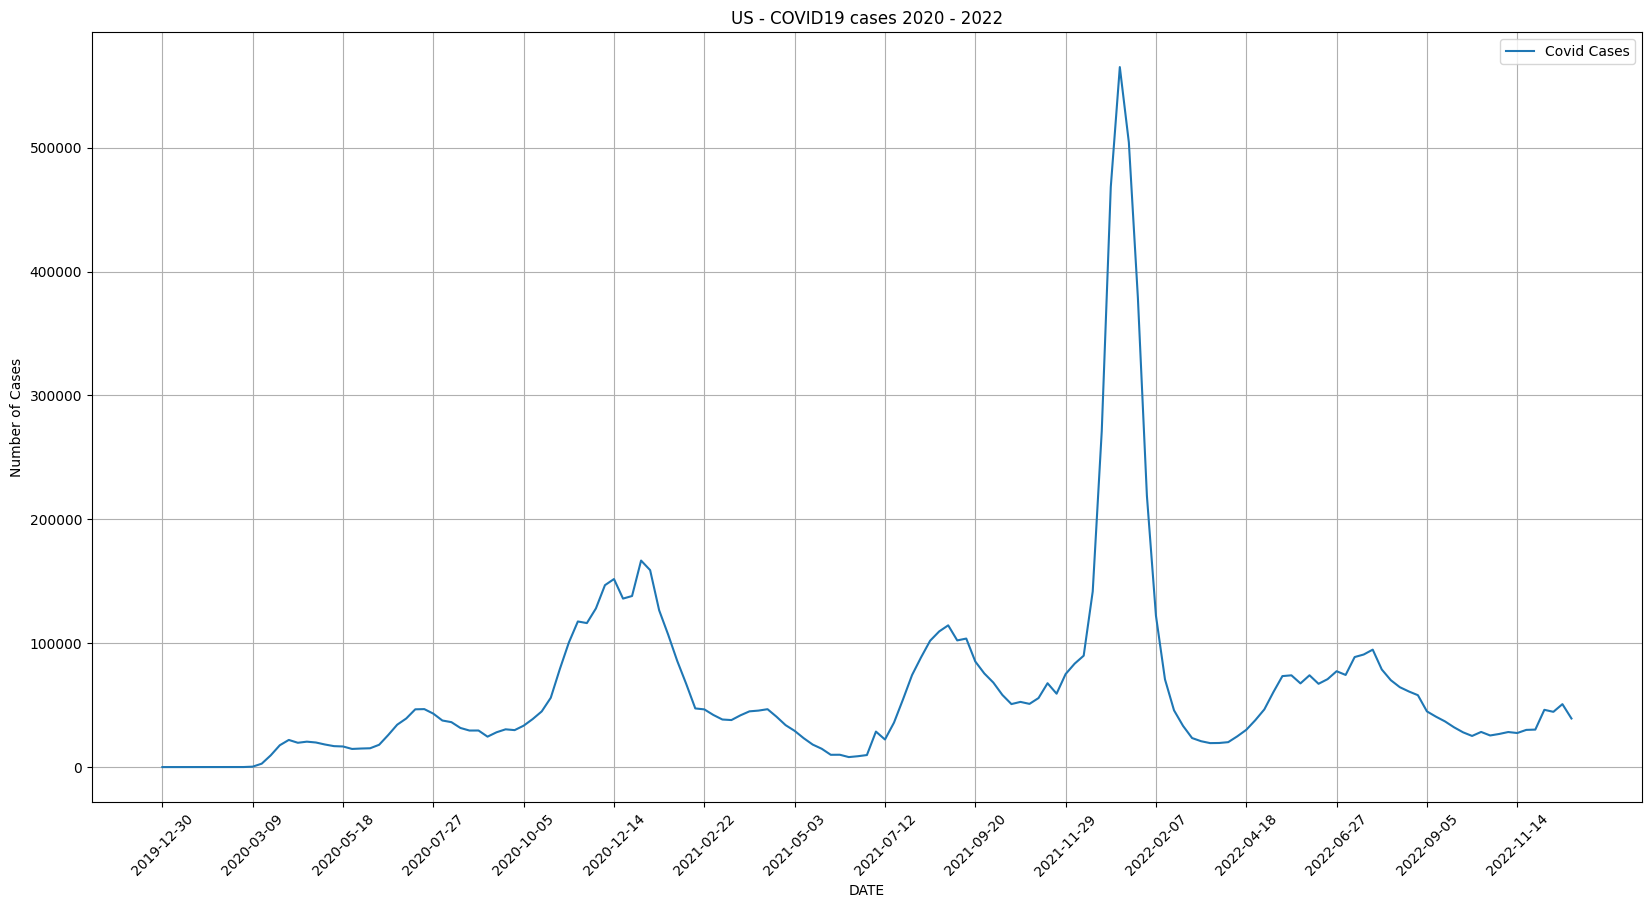

In [5]:
# Load the data from the Excel file
df_2020_to_2022 = pd.read_excel('US_2020-2022_Covid19_Data.xlsx', engine='openpyxl')
df_agg4 = df_2020_to_2022.groupby(['ISO_YEAR','ISO_START_DATE']).agg({'DAILY_CASES': 'mean'}).reset_index()
df_agg4['ISO_START_DATE'] = df_agg4['ISO_START_DATE'].str.split('T').str[0]
plt.figure(figsize=(20, 10))
plt.plot(df_agg4['ISO_START_DATE'], df_agg4['DAILY_CASES'] / 10, label='Covid Cases')
plt.xlabel('DATE')
plt.ylabel('Number of Cases')
plt.title('US - COVID19 cases 2020 - 2022')

xtick_pos = np.arange(0, len(df_agg4['ISO_START_DATE']), 10)
plt.xticks(xtick_pos, df_agg4['ISO_START_DATE'][xtick_pos], rotation=45)
plt.legend()
plt.grid()
plt.show()

# Shared Plot

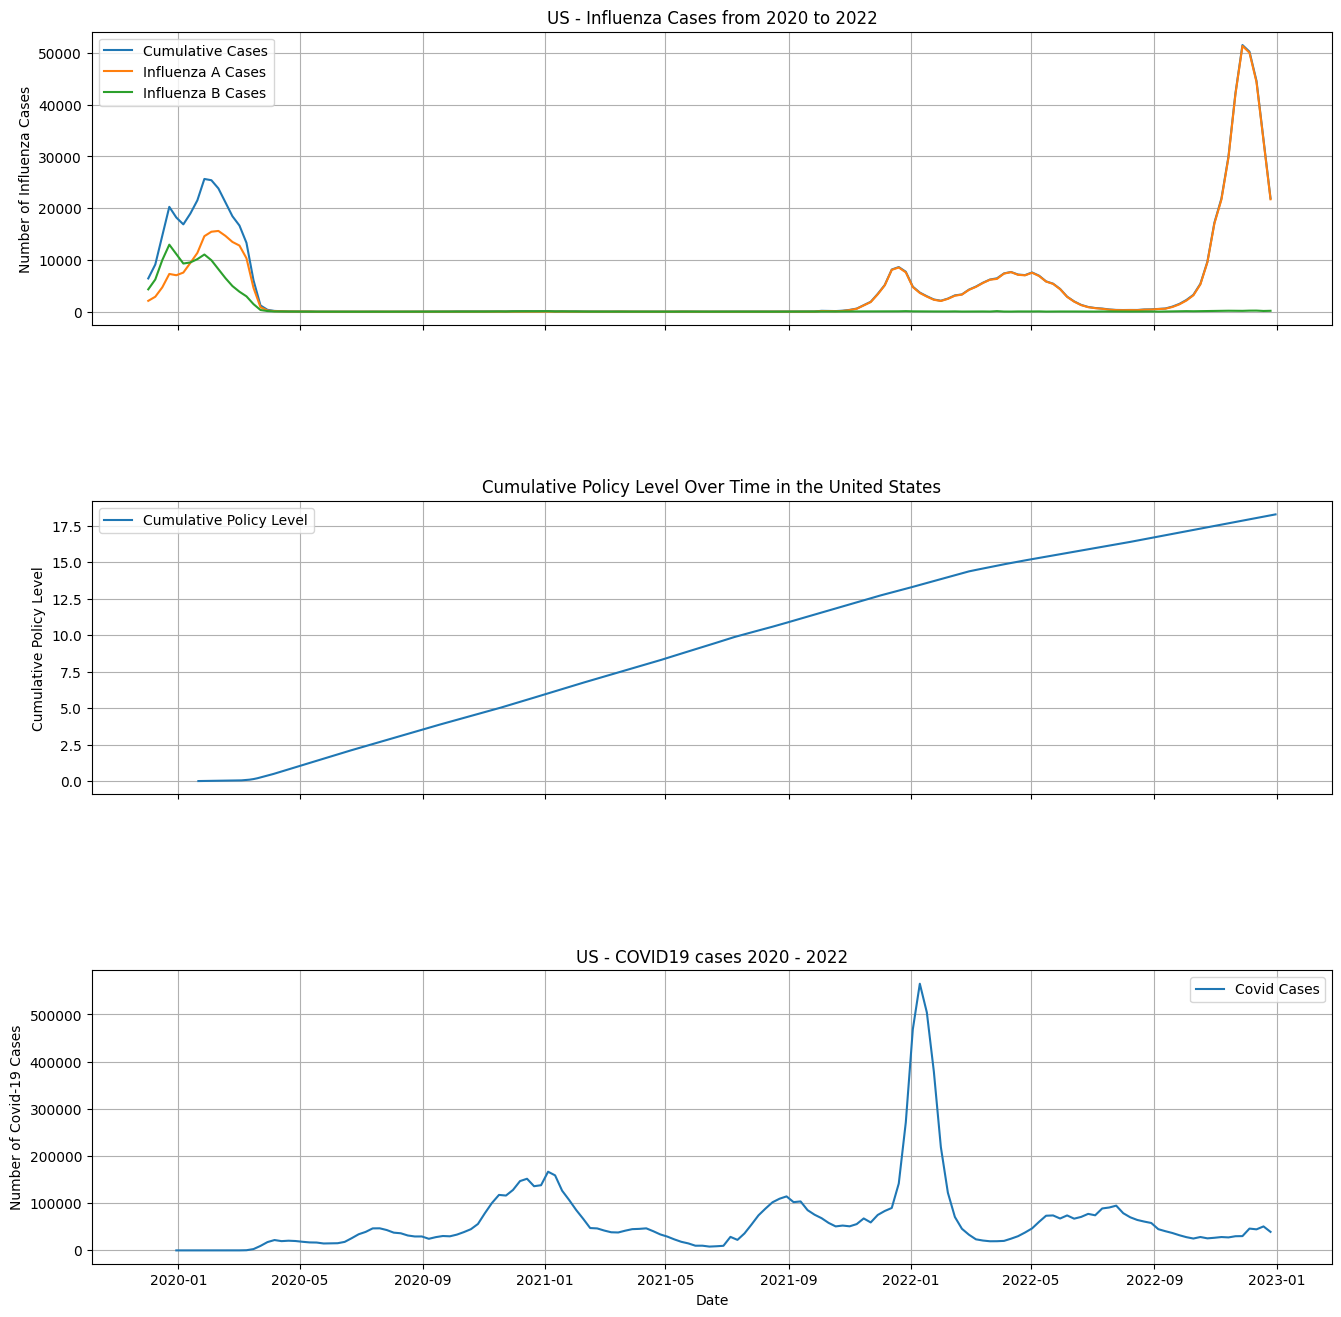

In [6]:
# Load the data from the Excel file
df_2020_to_2022_flu = pd.read_excel('US_2020-2022_influenza_Data.xlsx', engine='openpyxl')
df_2020_to_2022_covid = pd.read_excel('US_2020-2022_Covid19_Data.xlsx', engine='openpyxl')

# Group the data by year and ISO_WEEK, calculate the sum (sentinel and non-sentinel) of INF_ALL for each group
df_agg11 = df_2020_to_2022_flu.groupby(['ISO_YEAR', 'ISO_SDATE']).agg({'INF_ALL': 'sum', 'INF_A': 'sum', 'INF_B': 'sum'}).reset_index()

# Extract only the date portion of ISO_SDATE column
df_agg11['ISO_SDATE'] = pd.to_datetime(df_agg11['ISO_SDATE'].str.split('T').str[0])

df_agg4 = df_2020_to_2022_covid.groupby(['ISO_YEAR','ISO_START_DATE']).agg({'DAILY_CASES': 'mean'}).reset_index()
df_agg4['ISO_START_DATE'] = pd.to_datetime(df_agg4['ISO_START_DATE'].str.split('T').str[0])

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharex=True)

# Plot the Influenza cases
axes[0].plot(df_agg11['ISO_SDATE'], df_agg11['INF_ALL'], label='Cumulative Cases')
axes[0].plot(df_agg11['ISO_SDATE'], df_agg11['INF_A'], label='Influenza A Cases')
axes[0].plot(df_agg11['ISO_SDATE'], df_agg11['INF_B'], label='Influenza B Cases')
axes[0].set_ylabel('Number of Influenza Cases')
axes[0].set_title('US - Influenza Cases from 2020 to 2022')
axes[0].legend()
axes[0].grid()

# Plot the cumulative policy levels
axes[1].plot(df_policy_us_grouped['Date'], df_policy_us_grouped['cumulative_policy']/1000, label='Cumulative Policy Level')
axes[1].set_ylabel('Cumulative Policy Level')
axes[1].set_title('Cumulative Policy Level Over Time in the United States')
axes[1].legend()
axes[1].grid()

# Plot the Covid-19 cases
axes[2].plot(df_agg4['ISO_START_DATE'], df_agg4['DAILY_CASES'] / 10, label='Covid Cases')
axes[2].set_ylabel('Number of Covid-19 Cases')
axes[2].set_title('US - COVID19 cases 2020 - 2022')
axes[2].legend()
axes[2].grid()

# Set xlabel and xticks for the last subplot
axes[-1].set_xlabel('Date')

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.6)

# Show the combined graph
plt.show()
